# 1.Importing Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Importing Data

In [62]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')

In [63]:
df.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


**Dropping Unecessary Columns**

In [64]:
df.drop(["date","variation","feedback"],axis=1,inplace=True)

# 3.Preprocessing Step

* Performing `Tokenization`
* Removing `Stop Words`
* Removing `punctuation`
* `Stemming` (cutting off the end or the beginning of the word)
* `Lemmatization` (return the base or dictionary form of a word)


In [65]:
# Cleaning the texts
import re
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
lst=[]
for i in range(0,len(df)):
    
    #replace non-letter with space
    review = re.sub('[^a-zA-Z]', ' ', df['verified_reviews'][i])
    
    #convert all to lower case
    review=review.lower()
    
    #split
    review=review.split()
    
    #stemming and Lemmanization
    ps=PorterStemmer()
    lm = WordNetLemmatizer()
    
    review = [lm.lemmatize(word) for word in review if word not in set(stopwords.words('english'))] 
    review=' '.join(review)
    lst.append(review)

[nltk_data] Downloading package wordnet to C:\Users\Mayank
[nltk_data]     Rathi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [66]:
df["reviews"]=lst

In [67]:
df.drop("verified_reviews",axis=1,inplace=True)

In [68]:
df.head()

,rating,reviews
0,5,love echo
1,5,loved
2,4,sometimes playing game answer question correct...
3,5,lot fun thing yr old learns dinosaur control l...
4,5,music


# 4. TF IDF vectorization


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(lst).toarray()
y = df.iloc[:, 0].values

In [73]:
df["rating"].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

# 5. Implementing Model on our labels X and Y which we already extracted in above step

**Dividing our Dataset in training and test dataset**

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

### 5.1. Implementing Naive Bayes and checking accuracy of our model on it

In [75]:
# np.random.seed(46)
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()
model1.fit(x_train,y_train)
y_preds_nb=model1.predict(x_test)
print(f"The accuracy of our model is: {model1.score(x_test,y_test)*100:.2f}%")
print(f"The classification report of our model is:")
print(classification_report(y_test,y_preds_nb))

The accuracy of our model is: 37.94%
The classification report of our model is:
              precision    recall  f1-score   support

           1       0.10      0.26      0.15        23
           2       0.11      0.56      0.18        18
           3       0.08      0.36      0.13        25
           4       0.25      0.42      0.32        83
           5       0.81      0.37      0.51       481

    accuracy                           0.38       630
   macro avg       0.27      0.39      0.26       630
weighted avg       0.66      0.38      0.45       630



In [76]:
from sklearn.metrics import confusion_matrix
cn1=confusion_matrix(y_test,y_preds_nb)
cn1

array([[  6,   3,   2,   5,   7],
       [  0,  10,   1,   1,   6],
       [  1,   4,   9,   4,   7],
       [  7,  10,   8,  35,  23],
       [ 45,  68,  95,  94, 179]], dtype=int64)

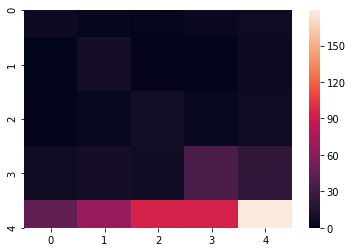

In [77]:
sns.heatmap(cn1);

### 5.2. Implementing RandomForestClassifier and checking accuracy of our model on it

In [78]:
np.random.seed(45)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
y_preds_rfc=model.predict(x_test)
print(f"The accuracy of our model is: {model.score(x_test,y_test)*100:.2f}%")
print(f"The classification report of our model is:")
print(classification_report(y_test,y_preds_rfc))

The accuracy of our model is: 83.33%
The classification report of our model is:
              precision    recall  f1-score   support

           1       0.78      0.30      0.44        23
           2       1.00      0.44      0.62        18
           3       1.00      0.36      0.53        25
           4       0.78      0.34      0.47        83
           5       0.83      0.98      0.90       481

    accuracy                           0.83       630
   macro avg       0.88      0.49      0.59       630
weighted avg       0.83      0.83      0.81       630



In [79]:
cn=confusion_matrix(y_test,y_preds_rfc)
cn

array([[  7,   0,   0,   0,  16],
       [  0,   8,   0,   1,   9],
       [  0,   0,   9,   1,  15],
       [  0,   0,   0,  28,  55],
       [  2,   0,   0,   6, 473]], dtype=int64)

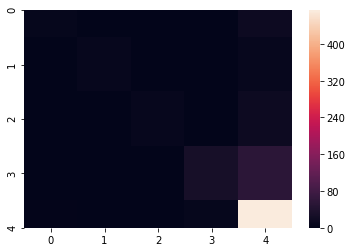

In [80]:
sns.heatmap(cn);